In [ ]:
path = '/content/drive/MyDrive/Aviator/Data1/bd_pseudo_1.csv'

In [ ]:
import pandas as pd
import numpy as np
import re
import datetime

In [ ]:
data = pd.read_csv(path)
data.head()

NameError: ignored

In [ ]:
t = 0
print(len(data))
t0 = int(input("Maximo: "))
tamanho_data = len(data)

odd = []
horario = []
odd_ajustada = []

while t <= t0:
    if t < tamanho_data:
        value = data['odd'][t]
        if isinstance(value, float):
            odd.append(np.nan)  # or any other value to represent missing data
        else:
            aux = value.split('\n\n')
            a1 = aux[0].replace(')I', '')
            a2 = a1.replace(')', '')
            a3 = a2.replace('|', '1')
            a4 = a3.replace('?', '7')
            a5 = re.sub('[^0-9.]', '', a4)
            odd.append(float(a5))
        horario.append(data['hora_criacao'][t])

    t += 1

for name in odd:
    ajuste = float(name - 1.25)
    odd_ajustada.append(ajuste)

horas = []
minutos = []
segundos = []
for item in horario:
    dt = datetime.datetime.strptime(item, "%a %b %d %H:%M:%S %Y")
    horas.append(dt.hour)
    minutos.append(dt.minute)
    segundos.append(dt.second)

data1 = pd.DataFrame({'Odd_ajustada': odd, 'hora': horas, 'minutos': minutos, 'segundos': segundos, 'horario': horario})

data2 = pd.DataFrame({'horario': horario, 'Odd_ajustada': odd})

tempo = []
for i in range(0, len(data2)-1):
    #print(data2['horario'][i])
    name = pd.to_datetime(data2['horario'][i + 1]) - pd.to_datetime(data2['horario'][i])
    tempo.append(name)


# Convertendo para segundos
tempo_em_segundos = [t.total_seconds() for t in tempo]
tempo_em_segundos.append(12)
# Adicionando a coluna de tempo em segundos ao DataFrame
data1['tempo_em_segundos'] = tempo_em_segundos

dados_filtrados = data2[data2['Odd_ajustada'] < 20]

###Data final
#data = dados_filtrados
data = data1

# Verificar se existem valores NaN na coluna "Odd_ajustada"
has_nan = data['Odd_ajustada'].isna().any()
if has_nan:
    print("Existem valores NaN na coluna 'Odd_ajustada'.")
else:
    print("Não existem valores NaN na coluna 'Odd_ajustada'.")

26401
Maximo: 26401
Não existem valores NaN na coluna 'Odd_ajustada'.


In [ ]:
data.head()

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12.0
1,1.44,0,28,18,Sat May 27 00:28:18 2023,24.0
2,3.39,0,28,42,Sat May 27 00:28:42 2023,14.0
3,1.27,0,28,56,Sat May 27 00:28:56 2023,30.0
4,5.16,0,29,26,Sat May 27 00:29:26 2023,24.0


In [ ]:
odd125 = []
odd150 = []
odd200 = []
odd500 = []
odd1000 = []
odd2000 = []
odd5000 = []
odd10000 = []

In [ ]:
for name in data['Odd_ajustada']:
  if name >= 1.25 and name < 1.50:
    odd125.append(1)
  else:
    odd125.append(0)

In [ ]:
for name in data['Odd_ajustada']:
  if name >= 1.50 and name < 2.00:
    odd150.append(1)
  else:
    odd150.append(0)

In [ ]:
for name in data['Odd_ajustada']:
  if name >= 2 and name < 5:
    odd200.append(1)
  else:
    odd200.append(0)

In [ ]:
for name in data['Odd_ajustada']:
  if name >= 5 and name < 10:
    odd500.append(1)
  else:
    odd500.append(0)

In [ ]:
for name in data['Odd_ajustada']:
  if name >= 10 and name < 20:
    odd1000.append(1)
  else:
    odd1000.append(0)

In [ ]:
for name in data['Odd_ajustada']:
  if name >= 20 and name < 50:
    odd2000.append(1)
  else:
    odd2000.append(0)

In [ ]:
for name in data['Odd_ajustada']:
  if name >= 50 and name < 100:
    odd5000.append(1)
  else:
    odd5000.append(0)

In [ ]:
for name in data['Odd_ajustada']:
  if name >= 100:
    odd10000.append(1)
  else:
    odd10000.append(0)

In [ ]:
result = pd.DataFrame([odd125, odd150, odd200, odd500, odd1000, odd2000, odd5000, odd10000]).T

In [ ]:
result.columns = ['odd125', 'odd150','odd200', 'odd500', 'odd1000','odd2000','odd5000','odd10000']
print(result)


       odd125  odd150  odd200  odd500  odd1000  odd2000  odd5000  odd10000
0           0       0       0       0        1        0        0         0
1           1       0       0       0        0        0        0         0
2           0       0       1       0        0        0        0         0
3           1       0       0       0        0        0        0         0
4           0       0       0       1        0        0        0         0
...       ...     ...     ...     ...      ...      ...      ...       ...
26396       0       0       0       0        0        1        0         0
26397       1       0       0       0        0        0        0         0
26398       0       0       0       0        0        1        0         0
26399       1       0       0       0        0        0        0         0
26400       0       0       0       0        0        0        0         0

[26401 rows x 8 columns]


In [ ]:
data = pd.concat([data, result], axis = 1)

In [ ]:
data

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12.0
1,1.44,0,28,18,Sat May 27 00:28:18 2023,24.0
2,3.39,0,28,42,Sat May 27 00:28:42 2023,14.0
3,1.27,0,28,56,Sat May 27 00:28:56 2023,30.0
4,5.16,0,29,26,Sat May 27 00:29:26 2023,24.0
...,...,...,...,...,...,...
26396,29.39,17,22,20,Sat Sep 23 17:22:20 2023,4876.0
26397,1.34,18,43,36,Sat Sep 23 18:43:36 2023,46.0
26398,27.12,18,44,22,Sat Sep 23 18:44:22 2023,7.0
26399,1.45,18,44,29,Sat Sep 23 18:44:29 2023,4.0


In [ ]:
data.head(20)

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos,odd125,odd150,odd200,odd500,odd1000,odd2000,odd5000,odd10000
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12.0,0,0,0,0,1,0,0,0
1,1.44,0,28,18,Sat May 27 00:28:18 2023,24.0,1,0,0,0,0,0,0,0
2,3.39,0,28,42,Sat May 27 00:28:42 2023,14.0,0,0,1,0,0,0,0,0
3,1.27,0,28,56,Sat May 27 00:28:56 2023,30.0,1,0,0,0,0,0,0,0
4,5.16,0,29,26,Sat May 27 00:29:26 2023,24.0,0,0,0,1,0,0,0,0
5,2.65,0,29,50,Sat May 27 00:29:50 2023,13.0,0,0,1,0,0,0,0,0
6,1.00,0,30,3,Sat May 27 00:30:03 2023,15.0,0,0,0,0,0,0,0,0
7,1.81,0,30,18,Sat May 27 00:30:18 2023,20.0,0,1,0,0,0,0,0,0
8,1.88,0,30,38,Sat May 27 00:30:38 2023,16.0,0,1,0,0,0,0,0,0
9,1.60,0,30,54,Sat May 27 00:30:54 2023,24.0,0,1,0,0,0,0,0,0


In [ ]:
geral_cat = []
for name in data['Odd_ajustada']:
  #print(name)
  if name < 1.25:
    geral_cat.append(1)
  elif name >= 1.25 and name < 2.00:
    geral_cat.append(2)
  elif name >= 2 and name < 5:
    geral_cat.append(3)
  elif name >= 5 and name < 10:
    geral_cat.append(4)
  elif name >= 10 and name < 20:
    geral_cat.append(5)
  elif name >= 20 and name < 50:
    geral_cat.append(6)
  elif name >= 50 and name < 100:
    geral_cat.append(7)
  elif name >= 100 and name < 200:
    geral_cat.append(8)
  elif name >= 200 and name < 500:
    geral_cat.append(9)
  elif name >= 500 and name < 1000:
    geral_cat.append(10)
  elif name >= 1000:
    geral_cat.append(11)
print(len(geral_cat))
geral_cat1 = pd.DataFrame([geral_cat]).T
geral_cat1.columns = ['Odd_Categoria']
geral_cat1.head(20)

26338


,Odd_Categoria
0,5
1,2
2,3
3,2
4,4
5,3
6,1
7,2
8,2
9,2


In [ ]:
data = pd.concat([data, geral_cat1], axis = 1)

In [ ]:

data.head(20)

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos,media_movel_segundo5,media_movel_segundo10,media_movel_segundo20,media_movel_segundo40,media_movel_segundo80,media_movel_segundo160,media_movel_segundo320,media_movel_segundo640,parte_do_dia,Odd_Categoria
0,13.89,0.0,28.0,6.0,Sat May 27 00:28:06 2023,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0
1,1.44,0.0,28.0,18.0,Sat May 27 00:28:18 2023,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0
2,3.39,0.0,28.0,42.0,Sat May 27 00:28:42 2023,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0
3,1.27,0.0,28.0,56.0,Sat May 27 00:28:56 2023,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0
4,5.16,0.0,29.0,26.0,Sat May 27 00:29:26 2023,24.0,20.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
5,2.65,0.0,29.0,50.0,Sat May 27 00:29:50 2023,13.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0
6,1.00,0.0,30.0,3.0,Sat May 27 00:30:03 2023,15.0,19.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0
7,1.81,0.0,30.0,18.0,Sat May 27 00:30:18 2023,20.0,20.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0
8,1.88,0.0,30.0,38.0,Sat May 27 00:30:38 2023,16.0,17.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0
9,1.60,0.0,30.0,54.0,Sat May 27 00:30:54 2023,24.0,17.6,19.2,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Separar recursos (X) e rótulos (y)
X = data[['hora', 'minutos', 'segundos', 'tempo_em_segundos']].values
y = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))  # 64 unidades LSTM
model.add(Dense(64, activation='softmax'))  # Camada de saída com ativação softmax para 11 categorias

# Compilar o modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=50, batch_size=32, validation_split=0.2)

# Avaliar o modelo no conjunto de teste
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[1]
print(f'Acurácia do modelo: {accuracy}')

# Fazer previsões
predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))


Epoch 1/50
528/528 [==============================] - 6s 7ms/step - loss: 1.8778 - accuracy: 0.2826 - val_loss: 1.6527 - val_accuracy: 0.2938
Epoch 2/50
528/528 [==============================] - 3s 6ms/step - loss: 1.6214 - accuracy: 0.2915 - val_loss: 1.6492 - val_accuracy: 0.2938
Epoch 3/50
528/528 [==============================] - 2s 4ms/step - loss: 1.6200 - accuracy: 0.2938 - val_loss: 1.6621 - val_accuracy: 0.2356
Epoch 4/50
528/528 [==============================] - 2s 4ms/step - loss: 1.6201 - accuracy: 0.2836 - val_loss: 1.6515 - val_accuracy: 0.3007
Epoch 5/50
528/528 [==============================] - 2s 4ms/step - loss: 1.6200 - accuracy: 0.2933 - val_loss: 1.6477 - val_accuracy: 0.2914
Epoch 6/50
528/528 [==============================] - 3s 6ms/step - loss: 1.6198 - accuracy: 0.2911 - val_loss: 1.6496 - val_accuracy: 0.2938
Epoch 7/50
528/528 [==============================] - 3s 6ms/step - loss: 1.6195 - accuracy: 0.2926 - val_loss: 1.6508 - val_accuracy: 0.3028
Epoch 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
import tensorflow as tf

In [ ]:
# Separar recursos (X) e rótulos (y)
X = data[['hora', 'minutos', 'segundos', 'tempo_em_segundos']].values
y = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo LSTM com camadas adicionais e dropout
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))  # Camada LSTM com retorno de sequência
model.add(Dropout(0.2))  # Camada de dropout para redução de overfitting
model.add(LSTM(64))  # Segunda camada LSTM
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Camada densa com regularização L2
model.add(Dense(12, activation='softmax'))  # Camada de saída com ativação softmax para 11 categorias

# Compilar o modelo com uma taxa de aprendizado menor
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=50, batch_size=32, validation_split=0.2)

# Avaliar o modelo no conjunto de teste
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[1]
print(f'Acurácia do modelo: {accuracy}')

# Fazer previsões
predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))



Epoch 1/50
528/528 [==============================] - 10s 12ms/step - loss: 1.7075 - accuracy: 0.2854 - val_loss: 1.6716 - val_accuracy: 0.2964
Epoch 2/50
528/528 [==============================] - 4s 8ms/step - loss: 1.6400 - accuracy: 0.2848 - val_loss: 1.6618 - val_accuracy: 0.2914
Epoch 3/50
528/528 [==============================] - 5s 9ms/step - loss: 1.6339 - accuracy: 0.2856 - val_loss: 1.6605 - val_accuracy: 0.2940
Epoch 4/50
528/528 [==============================] - 6s 12ms/step - loss: 1.6289 - accuracy: 0.2853 - val_loss: 1.6554 - val_accuracy: 0.2914
Epoch 5/50
528/528 [==============================] - 4s 8ms/step - loss: 1.6261 - accuracy: 0.2928 - val_loss: 1.6530 - val_accuracy: 0.2940
Epoch 6/50
528/528 [==============================] - 4s 8ms/step - loss: 1.6239 - accuracy: 0.2923 - val_loss: 1.6532 - val_accuracy: 0.2940
Epoch 7/50
528/528 [==============================] - 5s 9ms/step - loss: 1.6221 - accuracy: 0.2901 - val_loss: 1.6501 - val_accuracy: 0.2936
Epo

In [ ]:
data['tempo_em_segundos'].describe()

count    26338.000000
mean        23.223745
std         13.138461
min          3.000000
25%         15.000000
50%         19.000000
75%         28.000000
max        292.000000
Name: tempo_em_segundos, dtype: float64

In [ ]:
# Calcule o terceiro quartil (75%)
third_quartile = data['tempo_em_segundos'].quantile(0.75)

# Filtre os dados para manter apenas os valores abaixo do terceiro quartil
data = data[data['tempo_em_segundos'] <= 300]

# Verifique novamente a descrição estatística após a remoção
print(data['tempo_em_segundos'].describe())


count    26338.000000
mean        23.223745
std         13.138461
min          3.000000
25%         15.000000
50%         19.000000
75%         28.000000
max        292.000000
Name: tempo_em_segundos, dtype: float64


In [ ]:
# Separar recursos (X) e rótulos (y)
X = data[['hora', 'minutos', 'segundos', 'tempo_em_segundos']].values
y = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo LSTM com camadas adicionais e dropout
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))  # Camada LSTM com retorno de sequência
model.add(Dropout(0.2))  # Camada de dropout para redução de overfitting
model.add(LSTM(64))  # Segunda camada LSTM
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Camada densa com regularização L2
model.add(Dense(12, activation='softmax'))  # Camada de saída com ativação softmax para 11 categorias

# Compilar o modelo com uma taxa de aprendizado menor
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=50, batch_size=32, validation_split=0.2)

# Avaliar o modelo no conjunto de teste
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[1]
print(f'Acurácia do modelo: {accuracy}')

# Fazer previsões
predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))



Epoch 1/50
527/527 [==============================] - 12s 13ms/step - loss: 1.7144 - accuracy: 0.2929 - val_loss: 1.6654 - val_accuracy: 0.2798
Epoch 2/50
527/527 [==============================] - 5s 10ms/step - loss: 1.6429 - accuracy: 0.2936 - val_loss: 1.6516 - val_accuracy: 0.2814
Epoch 3/50
527/527 [==============================] - 5s 9ms/step - loss: 1.6365 - accuracy: 0.2936 - val_loss: 1.6472 - val_accuracy: 0.2741
Epoch 4/50
527/527 [==============================] - 7s 13ms/step - loss: 1.6326 - accuracy: 0.2933 - val_loss: 1.6479 - val_accuracy: 0.2798
Epoch 5/50
527/527 [==============================] - 5s 9ms/step - loss: 1.6300 - accuracy: 0.2953 - val_loss: 1.6417 - val_accuracy: 0.2814
Epoch 6/50
527/527 [==============================] - 5s 10ms/step - loss: 1.6290 - accuracy: 0.2931 - val_loss: 1.6382 - val_accuracy: 0.2769
Epoch 7/50
527/527 [==============================] - 6s 11ms/step - loss: 1.6269 - accuracy: 0.2967 - val_loss: 1.6407 - val_accuracy: 0.2814


In [ ]:
print(len(data))

26399


In [ ]:
data['media_movel_segundo5'] = data['tempo_em_segundos'].rolling(window=5).mean()
data['media_movel_segundo10'] = data['tempo_em_segundos'].rolling(window=10).mean()
data['media_movel_segundo20'] = data['tempo_em_segundos'].rolling(window=20).mean()
data['media_movel_segundo40'] = data['tempo_em_segundos'].rolling(window=40).mean()
data['media_movel_segundo80'] = data['tempo_em_segundos'].rolling(window=80).mean()
data['media_movel_segundo160'] = data['tempo_em_segundos'].rolling(window=160).mean()
data['media_movel_segundo320'] = data['tempo_em_segundos'].rolling(window=320).mean()
data['media_movel_segundo640'] = data['tempo_em_segundos'].rolling(window=640).mean()

def identificar_parte_do_dia(hora):
    if 6 <= hora < 12:
        return 1
    elif 12 <= hora < 18:
        return 2
    elif 18 <= hora < 24:
        return 3
    else:
        return 4

data['parte_do_dia'] = data['hora'].apply(identificar_parte_do_dia)

data['odd_categoria_media_movel5'] = data['Odd_Categoria'].rolling(window=5).mean()
data['odd_categoria_media_movel10'] = data['Odd_Categoria'].rolling(window=10).mean()
data['odd_categoria_media_movel20'] = data['Odd_Categoria'].rolling(window=20).mean()
data['odd_categoria_media_movel40'] = data['Odd_Categoria'].rolling(window=40).mean()
data['odd_categoria_media_movel80'] = data['Odd_Categoria'].rolling(window=80).mean()
data['odd_categoria_media_movel160'] = data['Odd_Categoria'].rolling(window=160).mean()
data['odd_categoria_media_movel320'] = data['Odd_Categoria'].rolling(window=320).mean()
data['odd_categoria_media_movel640'] = data['Odd_Categoria'].rolling(window=640).mean()


In [ ]:
data.head(20)

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos,Odd_Categoria,media_movel_segundo5,media_movel_segundo10,media_movel_segundo20,...,media_movel_segundo640,parte_do_dia,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12.0,5,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.44,0,28,18,Sat May 27 00:28:18 2023,24.0,2,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.39,0,28,42,Sat May 27 00:28:42 2023,14.0,3,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.27,0,28,56,Sat May 27 00:28:56 2023,30.0,2,NaN,NaN,NaN,...,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.16,0,29,26,Sat May 27 00:29:26 2023,24.0,4,20.8,NaN,NaN,...,NaN,4,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.65,0,29,50,Sat May 27 00:29:50 2023,13.0,3,21.0,NaN,NaN,...,NaN,4,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.00,0,30,3,Sat May 27 00:30:03 2023,15.0,1,19.2,NaN,NaN,...,NaN,4,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.81,0,30,18,Sat May 27 00:30:18 2023,20.0,2,20.4,NaN,NaN,...,NaN,4,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.88,0,30,38,Sat May 27 00:30:38 2023,16.0,2,17.6,NaN,NaN,...,NaN,4,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.60,0,30,54,Sat May 27 00:30:54 2023,24.0,2,17.6,19.2,NaN,...,NaN,4,2.0,2.6,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.fillna(data.mean())  # Preencher com a média da coluna

<ipython-input-16-463de256ebf1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())  # Preencher com a média da coluna


In [ ]:
data.head()

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos,media_movel_segundo5,media_movel_segundo10,media_movel_segundo20,media_movel_segundo40,...,parte_do_dia,Odd_Categoria,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640
0,13.89,0.0,28.0,6.0,Sat May 27 00:28:06 2023,12.0,23.225009,23.224574,23.22437,23.224725,...,4,5.0,2.620934,2.620942,2.621106,2.621471,2.621637,2.621782,2.621242,2.620655
1,1.44,0.0,28.0,18.0,Sat May 27 00:28:18 2023,24.0,23.225009,23.224574,23.22437,23.224725,...,4,2.0,2.620934,2.620942,2.621106,2.621471,2.621637,2.621782,2.621242,2.620655
2,3.39,0.0,28.0,42.0,Sat May 27 00:28:42 2023,14.0,23.225009,23.224574,23.22437,23.224725,...,4,3.0,2.620934,2.620942,2.621106,2.621471,2.621637,2.621782,2.621242,2.620655
3,1.27,0.0,28.0,56.0,Sat May 27 00:28:56 2023,30.0,23.225009,23.224574,23.22437,23.224725,...,4,2.0,2.620934,2.620942,2.621106,2.621471,2.621637,2.621782,2.621242,2.620655
4,5.16,0.0,29.0,26.0,Sat May 27 00:29:26 2023,24.0,20.800000,23.224574,23.22437,23.224725,...,4,4.0,3.200000,2.620942,2.621106,2.621471,2.621637,2.621782,2.621242,2.620655


In [ ]:
data.describe()

,Odd_ajustada,hora,minutos,segundos,tempo_em_segundos,Odd_Categoria,media_movel_segundo5,media_movel_segundo10,media_movel_segundo20,media_movel_segundo40,...,media_movel_segundo640,parte_do_dia,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640
count,26338.000000,26338.000000,26338.000000,26338.000000,26338.000000,26338.000000,26338.000000,26338.000000,26338.000000,26338.000000,...,26338.000000,26338.000000,26338.000000,26338.000000,26338.000000,26338.000000,26338.000000,26338.000000,26338.000000,26338.000000
mean,13.782136,11.629053,29.429152,29.593325,23.223745,2.621004,23.225009,23.224574,23.224370,23.224725,...,23.191917,2.655403,2.620961,2.620939,2.621067,2.621287,2.621297,2.621454,2.620942,2.620352
std,502.707581,7.023023,17.284693,17.113507,13.138461,1.427427,5.878041,4.231686,3.078813,2.245880,...,0.749426,1.048080,0.640974,0.460506,0.332728,0.241352,0.177378,0.130799,0.096930,0.070325
min,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,7.400000,12.600000,14.850000,17.125000,...,21.575000,1.000000,1.000000,1.100000,1.350000,1.750000,1.850000,1.918750,2.187500,2.300000
25%,1.290000,5.000000,14.000000,14.000000,15.000000,2.000000,19.200000,20.300000,21.050000,21.625000,...,22.620313,2.000000,2.200000,2.300000,2.400000,2.450000,2.500000,2.537500,2.565625,2.578125
50%,1.920000,13.000000,29.000000,29.000000,19.000000,2.000000,22.400000,22.700000,22.950000,23.050000,...,23.140625,3.000000,2.600000,2.600000,2.600000,2.625000,2.612500,2.621454,2.621875,2.620312
75%,3.830000,18.000000,44.000000,44.000000,28.000000,3.000000,26.200000,25.500000,24.950000,24.600000,...,23.714063,4.000000,3.000000,2.900000,2.850000,2.775000,2.737500,2.712500,2.684375,2.667187
max,70126.000000,23.000000,59.000000,59.000000,292.000000,11.000000,80.400000,60.600000,42.850000,36.925000,...,25.632812,4.000000,6.200000,5.000000,4.000000,3.650000,3.187500,2.975000,2.896875,2.796875


In [ ]:
data.columns

Index(['Odd_ajustada', 'hora', 'minutos', 'segundos', 'horario',
       'tempo_em_segundos', 'media_movel_segundo5', 'media_movel_segundo10',
       'media_movel_segundo20', 'media_movel_segundo40',
       'media_movel_segundo80', 'media_movel_segundo160',
       'media_movel_segundo320', 'media_movel_segundo640', 'parte_do_dia',
       'Odd_Categoria', 'odd_categoria_media_movel5',
       'odd_categoria_media_movel10', 'odd_categoria_media_movel20',
       'odd_categoria_media_movel40', 'odd_categoria_media_movel80',
       'odd_categoria_media_movel160', 'odd_categoria_media_movel320',
       'odd_categoria_media_movel640'],
      dtype='object')

In [ ]:
# Separar recursos (X) e rótulos (y)
X = data[['hora', 'minutos', 'segundos', 'tempo_em_segundos','parte_do_dia' ,'media_movel_segundo5', 'media_movel_segundo10', 'media_movel_segundo20','media_movel_segundo40', 'media_movel_segundo80', 'media_movel_segundo160', 'media_movel_segundo320', 'media_movel_segundo640', 'odd_categoria_media_movel5', 'odd_categoria_media_movel10','odd_categoria_media_movel20', 'odd_categoria_media_movel40', 'odd_categoria_media_movel80', 'odd_categoria_media_movel160', 'odd_categoria_media_movel320', 'odd_categoria_media_movel640']].values
y = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo LSTM com camadas adicionais e dropout
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))  # Camada LSTM com retorno de sequência
model.add(Dropout(0.2))  # Camada de dropout para redução de overfitting
model.add(LSTM(64))  # Segunda camada LSTM
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Camada densa com regularização L2
model.add(Dense(12, activation='softmax'))  # Camada de saída com ativação softmax para 11 categorias

# Compilar o modelo com uma taxa de aprendizado menor
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=50, batch_size=32, validation_split=0.2)

# Avaliar o modelo no conjunto de teste
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[1]
print(f'Acurácia do modelo: {accuracy}')

# Fazer previsões
predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))



Epoch 1/50
527/527 [==============================] - 81s 40ms/step - loss: 1.6734 - accuracy: 0.3074 - val_loss: 1.6450 - val_accuracy: 0.2848
Epoch 2/50
527/527 [==============================] - 18s 35ms/step - loss: 1.6170 - accuracy: 0.3131 - val_loss: 1.6027 - val_accuracy: 0.3007
Epoch 3/50
527/527 [==============================] - 19s 35ms/step - loss: 1.5819 - accuracy: 0.3236 - val_loss: 1.5843 - val_accuracy: 0.3303
Epoch 4/50
527/527 [==============================] - 18s 34ms/step - loss: 1.5668 - accuracy: 0.3277 - val_loss: 1.5809 - val_accuracy: 0.3073
Epoch 5/50
527/527 [==============================] - 19s 36ms/step - loss: 1.5610 - accuracy: 0.3262 - val_loss: 1.5735 - val_accuracy: 0.3220
Epoch 6/50
527/527 [==============================] - 20s 39ms/step - loss: 1.5541 - accuracy: 0.3284 - val_loss: 1.5640 - val_accuracy: 0.3431
Epoch 7/50
527/527 [==============================] - 18s 33ms/step - loss: 1.5505 - accuracy: 0.3299 - val_loss: 1.5648 - val_accuracy:

In [ ]:
# Estatísticas Descritivas
data['odd_mediana5'] = data['Odd_ajustada'].rolling(window=5).median()
data['odd_mediana10'] = data['Odd_ajustada'].rolling(window=10).median()
data['odd_mediana20'] = data['Odd_ajustada'].rolling(window=20).median()
data['odd_mediana40'] = data['Odd_ajustada'].rolling(window=40).median()
data['odd_mediana80'] = data['Odd_ajustada'].rolling(window=80).median()
data['odd_mediana160'] = data['Odd_ajustada'].rolling(window=160).median()
data['odd_mediana320'] = data['Odd_ajustada'].rolling(window=320).median()
data['odd_mediana640'] = data['Odd_ajustada'].rolling(window=640).median()

data['odd_desvio_padrao5'] = data['Odd_ajustada'].rolling(window=5).std()
data['odd_desvio_padrao10'] = data['Odd_ajustada'].rolling(window=10).std()
data['odd_desvio_padrao20'] = data['Odd_ajustada'].rolling(window=20).std()
data['odd_desvio_padrao40'] = data['Odd_ajustada'].rolling(window=40).std()
data['odd_desvio_padrao80'] = data['Odd_ajustada'].rolling(window=80).std()
data['odd_desvio_padrao160'] = data['Odd_ajustada'].rolling(window=160).std()
data['odd_desvio_padrao320'] = data['Odd_ajustada'].rolling(window=320).std()
data['odd_desvio_padrao640'] = data['Odd_ajustada'].rolling(window=640).std()

data['odd_min5'] = data['Odd_ajustada'].rolling(window=5).min()
data['odd_min10'] = data['Odd_ajustada'].rolling(window=10).min()
data['odd_min20'] = data['Odd_ajustada'].rolling(window=20).min()
data['odd_min40'] = data['Odd_ajustada'].rolling(window=40).min()
data['odd_min80'] = data['Odd_ajustada'].rolling(window=80).min()
data['odd_min160'] = data['Odd_ajustada'].rolling(window=160).min()
data['odd_min320'] = data['Odd_ajustada'].rolling(window=320).min()
data['odd_min640'] = data['Odd_ajustada'].rolling(window=640).min()

data['odd_max5'] = data['Odd_ajustada'].rolling(window=5).max()
data['odd_max10'] = data['Odd_ajustada'].rolling(window=10).max()
data['odd_max20'] = data['Odd_ajustada'].rolling(window=20).max()
data['odd_max40'] = data['Odd_ajustada'].rolling(window=40).max()
data['odd_max80'] = data['Odd_ajustada'].rolling(window=80).max()
data['odd_max160'] = data['Odd_ajustada'].rolling(window=160).max()
data['odd_max320'] = data['Odd_ajustada'].rolling(window=320).max()
data['odd_max640'] = data['Odd_ajustada'].rolling(window=640).max()

# Tendência das Odds
data['odd_tendencia'] = data['Odd_ajustada'].diff()

# Frequência de Categorias (assumindo que 'Odd_Categoria' é categórico)
data['categoria_frequencia5'] = data['Odd_Categoria'].rolling(window=5).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia10'] = data['Odd_Categoria'].rolling(window=10).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia20'] = data['Odd_Categoria'].rolling(window=20).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia40'] = data['Odd_Categoria'].rolling(window=40).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia80'] = data['Odd_Categoria'].rolling(window=80).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia160'] = data['Odd_Categoria'].rolling(window=160).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia320'] = data['Odd_Categoria'].rolling(window=320).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia640'] = data['Odd_Categoria'].rolling(window=640).apply(lambda x: x.value_counts().idxmax())

# Tendência de Média Móvel
data['tendencia_media_movel'] = data['media_movel_segundo5'].diff()
data['tendencia_media_movel'] = data['media_movel_segundo10'].diff()
data['tendencia_media_movel'] = data['media_movel_segundo20'].diff()
data['tendencia_media_movel'] = data['media_movel_segundo40'].diff()
data['tendencia_media_movel'] = data['media_movel_segundo80'].diff()
data['tendencia_media_movel'] = data['media_movel_segundo160'].diff()
data['tendencia_media_movel'] = data['media_movel_segundo320'].diff()
data['tendencia_media_movel'] = data['media_movel_segundo640'].diff()
data['tendencia_media_movel'] = data['odd_categoria_media_movel5'].diff()
data['tendencia_media_movel'] = data['odd_categoria_media_movel10'].diff()
data['tendencia_media_movel'] = data['odd_categoria_media_movel20'].diff()
data['tendencia_media_movel'] = data['odd_categoria_media_movel40'].diff()
data['tendencia_media_movel'] = data['odd_categoria_media_movel80'].diff()
data['tendencia_media_movel'] = data['odd_categoria_media_movel160'].diff()
data['tendencia_media_movel'] = data['odd_categoria_media_movel320'].diff()
data['tendencia_media_movel'] = data['odd_categoria_media_movel640'].diff()


# Correlações (exemplo com 'media_movel_segundo5')
data['correlacao_media_movel5'] = data['Odd_Categoria'].rolling(window=5).corr(data['media_movel_segundo5'])
data['correlacao_media_movel10'] = data['Odd_Categoria'].rolling(window=10).corr(data['media_movel_segundo10'])
data['correlacao_media_movel20'] = data['Odd_Categoria'].rolling(window=20).corr(data['media_movel_segundo20'])
data['correlacao_media_movel40'] = data['Odd_Categoria'].rolling(window=40).corr(data['media_movel_segundo40'])
data['correlacao_media_movel80'] = data['Odd_Categoria'].rolling(window=80).corr(data['media_movel_segundo80'])
data['correlacao_media_movel160'] = data['Odd_Categoria'].rolling(window=160).corr(data['media_movel_segundo160'])
data['correlacao_media_movel320'] = data['Odd_Categoria'].rolling(window=320).corr(data['media_movel_segundo320'])
data['correlacao_media_movel640'] = data['Odd_Categoria'].rolling(window=640).corr(data['media_movel_segundo640'])
data['correlacao_odd_categoria_media_movel5'] = data['Odd_Categoria'].rolling(window=5).corr(data['odd_categoria_media_movel5'])
data['correlacao_odd_categoria_media_movel10'] = data['Odd_Categoria'].rolling(window=10).corr(data['odd_categoria_media_movel10'])
data['correlacao_odd_categoria_media_movel20'] = data['Odd_Categoria'].rolling(window=20).corr(data['odd_categoria_media_movel20'])
data['correlacao_odd_categoria_media_movel40'] = data['Odd_Categoria'].rolling(window=40).corr(data['odd_categoria_media_movel40'])
data['correlacao_odd_categoria_media_movel80'] = data['Odd_Categoria'].rolling(window=80).corr(data['odd_categoria_media_movel80'])
data['correlacao_odd_categoria_media_movel160'] = data['Odd_Categoria'].rolling(window=160).corr(data['odd_categoria_media_movel160'])
data['correlacao_odd_categoria_media_movel320'] = data['Odd_Categoria'].rolling(window=320).corr(data['odd_categoria_media_movel320'])
data['correlacao_odd_categoria_media_movel640'] = data['Odd_Categoria'].rolling(window=640).corr(data['odd_categoria_media_movel640'])
# Recursos de Sazonalidade (por exemplo, dia da semana)
data['dia_da_semana'] = pd.to_datetime(data['horario']).dt.dayofweek


# Contagem de repetições das categorias
data['categoria_contagem'] = data['Odd_Categoria'].map(data['Odd_Categoria'].value_counts())

# Remova linhas com valores ausentes resultantes das operações de janelas
data = data.fillna(data.mean())

<ipython-input-19-3e4adc60a466>:95: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [ ]:
data.columns

Index(['Odd_ajustada', 'hora', 'minutos', 'segundos', 'horario',
       'tempo_em_segundos', 'media_movel_segundo5', 'media_movel_segundo10',
       'media_movel_segundo20', 'media_movel_segundo40',
       'media_movel_segundo80', 'media_movel_segundo160',
       'media_movel_segundo320', 'media_movel_segundo640', 'parte_do_dia',
       'Odd_Categoria', 'odd_categoria_media_movel5',
       'odd_categoria_media_movel10', 'odd_categoria_media_movel20',
       'odd_categoria_media_movel40', 'odd_categoria_media_movel80',
       'odd_categoria_media_movel160', 'odd_categoria_media_movel320',
       'odd_categoria_media_movel640', 'odd_mediana5', 'odd_mediana10',
       'odd_mediana20', 'odd_mediana40', 'odd_mediana80', 'odd_mediana160',
       'odd_mediana320', 'odd_mediana640', 'odd_desvio_padrao5',
       'odd_desvio_padrao10', 'odd_desvio_padrao20', 'odd_desvio_padrao40',
       'odd_desvio_padrao80', 'odd_desvio_padrao160', 'odd_desvio_padrao320',
       'odd_desvio_padrao640', 'odd_mi

In [ ]:
print(len(data.columns))

84


In [ ]:
data.describe()

,Odd_ajustada,hora,minutos,segundos,tempo_em_segundos,media_movel_segundo5,media_movel_segundo10,media_movel_segundo20,media_movel_segundo40,media_movel_segundo80,...,correlacao_odd_categoria_media_movel5,correlacao_odd_categoria_media_movel10,correlacao_odd_categoria_media_movel20,correlacao_odd_categoria_media_movel40,correlacao_odd_categoria_media_movel80,correlacao_odd_categoria_media_movel160,correlacao_odd_categoria_media_movel320,correlacao_odd_categoria_media_movel640,dia_da_semana,categoria_contagem
count,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,...,26399.000000,2.639900e+04,2.639900e+04,2.639900e+04,2.639900e+04,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000
mean,13.782136,11.629053,29.429152,29.593325,23.223745,23.225009,23.224574,23.224370,23.224725,23.221990,...,0.360247,-inf,NaN,NaN,NaN,0.083414,0.053865,0.040153,3.191814,6134.853025
std,502.126422,7.014904,17.264711,17.093723,13.123272,5.871246,4.226794,3.075254,2.243284,1.662626,...,0.432693,NaN,NaN,NaN,NaN,0.074621,0.054370,0.043336,2.049070,2303.173598
min,1.000000,0.000000,0.000000,0.000000,3.000000,7.400000,12.600000,14.850000,17.125000,19.150000,...,-1.000000,-inf,-inf,-inf,-inf,-0.237954,-0.184612,-0.154142,0.000000,22.000000
25%,1.290000,5.000000,14.000000,15.000000,15.000000,19.200000,20.300000,21.050000,21.625000,22.000000,...,0.102062,1.020111e-01,9.075608e-02,6.937137e-02,4.340861e-02,0.035588,0.019767,0.018489,1.000000,5934.000000
50%,1.930000,13.000000,29.000000,29.000000,20.000000,22.400000,22.700000,22.950000,23.050000,23.137500,...,0.443203,3.162278e-01,2.383206e-01,1.649268e-01,1.130895e-01,0.084100,0.053865,0.045060,3.000000,7635.000000
75%,3.850000,18.000000,44.000000,44.000000,28.000000,26.200000,25.500000,24.950000,24.600000,24.312500,...,0.693375,5.017270e-01,3.713820e-01,2.601061e-01,1.804139e-01,0.132380,0.088175,0.068019,5.000000,7720.000000
max,70126.000000,23.000000,59.000000,59.000000,292.000000,80.400000,60.600000,42.850000,36.925000,32.487500,...,1.000000,9.685486e-01,inf,inf,inf,0.353582,0.254468,0.197848,6.000000,7720.000000


In [ ]:
path1 = '/content/drive/MyDrive/Aviator/Data1/bd_Att.csv'
data.to_csv(path1)

In [ ]:
data = data.fillna(data.median())

<ipython-input-32-1ed84e2e0a3e>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median())


In [ ]:
data.head(20)

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos,media_movel_segundo5,media_movel_segundo10,media_movel_segundo20,media_movel_segundo40,...,correlacao_odd_categoria_media_movel5,correlacao_odd_categoria_media_movel10,correlacao_odd_categoria_media_movel20,correlacao_odd_categoria_media_movel40,correlacao_odd_categoria_media_movel80,correlacao_odd_categoria_media_movel160,correlacao_odd_categoria_media_movel320,correlacao_odd_categoria_media_movel640,dia_da_semana,categoria_contagem
0,13.89,0.0,28.0,6.0,Sat May 27 00:28:06 2023,12.0,23.225009,23.224574,23.22437,23.224725,...,0.443203,-inf,0.238321,0.164927,0.113089,0.083414,0.053865,0.040153,5.0,1266
1,1.44,0.0,28.0,18.0,Sat May 27 00:28:18 2023,24.0,23.225009,23.224574,23.22437,23.224725,...,0.443203,-inf,0.238321,0.164927,0.113089,0.083414,0.053865,0.040153,5.0,7720
2,3.39,0.0,28.0,42.0,Sat May 27 00:28:42 2023,14.0,23.225009,23.224574,23.22437,23.224725,...,0.443203,-inf,0.238321,0.164927,0.113089,0.083414,0.053865,0.040153,5.0,7635
3,1.27,0.0,28.0,56.0,Sat May 27 00:28:56 2023,30.0,23.225009,23.224574,23.22437,23.224725,...,0.443203,-inf,0.238321,0.164927,0.113089,0.083414,0.053865,0.040153,5.0,7720
4,5.16,0.0,29.0,26.0,Sat May 27 00:29:26 2023,24.0,20.800000,23.224574,23.22437,23.224725,...,0.342997,-inf,0.238321,0.164927,0.113089,0.083414,0.053865,0.040153,5.0,2573
5,2.65,0.0,29.0,50.0,Sat May 27 00:29:50 2023,13.0,21.000000,23.224574,23.22437,23.224725,...,0.869132,-inf,0.238321,0.164927,0.113089,0.083414,0.053865,0.040153,5.0,7635
6,1.00,0.0,30.0,3.0,Sat May 27 00:30:03 2023,15.0,19.200000,23.224574,23.22437,23.224725,...,0.788947,-inf,0.238321,0.164927,0.113089,0.083414,0.053865,0.040153,5.0,5934
7,1.81,0.0,30.0,18.0,Sat May 27 00:30:18 2023,20.0,20.400000,23.224574,23.22437,23.224725,...,0.837841,-inf,0.238321,0.164927,0.113089,0.083414,0.053865,0.040153,5.0,7720
8,1.88,0.0,30.0,38.0,Sat May 27 00:30:38 2023,16.0,17.600000,23.224574,23.22437,23.224725,...,0.812421,-inf,0.238321,0.164927,0.113089,0.083414,0.053865,0.040153,5.0,7720
9,1.60,0.0,30.0,54.0,Sat May 27 00:30:54 2023,24.0,17.600000,19.200000,23.22437,23.224725,...,0.238366,0.179605,0.238321,0.164927,0.113089,0.083414,0.053865,0.040153,5.0,7720


In [ ]:
# Verifique se há valores nulos em cada coluna
valores_ausentes = data.isna().sum()

# Exiba as colunas com valores nulos e suas contagens
print(valores_ausentes[valores_ausentes > 0])

horario    61
dtype: int64


In [ ]:
data.describe()

,Odd_ajustada,hora,minutos,segundos,tempo_em_segundos,media_movel_segundo5,media_movel_segundo10,media_movel_segundo20,media_movel_segundo40,media_movel_segundo80,...,correlacao_odd_categoria_media_movel5,correlacao_odd_categoria_media_movel10,correlacao_odd_categoria_media_movel20,correlacao_odd_categoria_media_movel40,correlacao_odd_categoria_media_movel80,correlacao_odd_categoria_media_movel160,correlacao_odd_categoria_media_movel320,correlacao_odd_categoria_media_movel640,dia_da_semana,categoria_contagem
count,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,...,26399.000000,2.639900e+04,2.639900e+04,2.639900e+04,2.639900e+04,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000
mean,13.782136,11.629053,29.429152,29.593325,23.223745,23.225009,23.224574,23.224370,23.224725,23.221990,...,0.360247,-inf,NaN,NaN,NaN,0.083414,0.053865,0.040153,3.191814,6134.853025
std,502.126422,7.014904,17.264711,17.093723,13.123272,5.871246,4.226794,3.075254,2.243284,1.662626,...,0.432693,NaN,NaN,NaN,NaN,0.074621,0.054370,0.043336,2.049070,2303.173598
min,1.000000,0.000000,0.000000,0.000000,3.000000,7.400000,12.600000,14.850000,17.125000,19.150000,...,-1.000000,-inf,-inf,-inf,-inf,-0.237954,-0.184612,-0.154142,0.000000,22.000000
25%,1.290000,5.000000,14.000000,15.000000,15.000000,19.200000,20.300000,21.050000,21.625000,22.000000,...,0.102062,1.020111e-01,9.075608e-02,6.937137e-02,4.340861e-02,0.035588,0.019767,0.018489,1.000000,5934.000000
50%,1.930000,13.000000,29.000000,29.000000,20.000000,22.400000,22.700000,22.950000,23.050000,23.137500,...,0.443203,3.162278e-01,2.383206e-01,1.649268e-01,1.130895e-01,0.084100,0.053865,0.045060,3.000000,7635.000000
75%,3.850000,18.000000,44.000000,44.000000,28.000000,26.200000,25.500000,24.950000,24.600000,24.312500,...,0.693375,5.017270e-01,3.713820e-01,2.601061e-01,1.804139e-01,0.132380,0.088175,0.068019,5.000000,7720.000000
max,70126.000000,23.000000,59.000000,59.000000,292.000000,80.400000,60.600000,42.850000,36.925000,32.487500,...,1.000000,9.685486e-01,inf,inf,inf,0.353582,0.254468,0.197848,6.000000,7720.000000


In [ ]:
# Calcule as correlações de rolagem
data['correlacao_media_movel5'] = data['Odd_Categoria'].rolling(window=5).corr(data['media_movel_segundo5'])
data['correlacao_odd_categoria_media_movel5'] = data['Odd_Categoria'].rolling(window=5).corr(data['odd_categoria_media_movel5'])

# Substitua os valores infinitos por NaN nas colunas resultantes
data['correlacao_media_movel5'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['correlacao_odd_categoria_media_movel5'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
data = data.fillna(data.median())

<ipython-input-43-1ed84e2e0a3e>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median())


In [ ]:
# Verifique se há valores infinitos em X
has_infinite_values = not np.isfinite(X).all()

if has_infinite_values:
    # Se houver valores infinitos, localize-os e lide com eles
    infinite_indices = np.where(~np.isfinite(X))
    print("Índices de valores infinitos:", infinite_indices)
    print(len(infinite_indices))
    # Lide com os valores infinitos, talvez substituindo-os por um valor apropriado ou removendo as linhas
else:
    print("Não há valores infinitos em X")


NameError: ignored

In [ ]:
# Verifique se há valores muito grandes em X
max_value = np.max(data)

if max_value > 1e10:  # Ajuste o limite conforme necessário
    # Se houver valores muito grandes, localize-os e lide com eles
    large_value_indices = np.where(X > 1e10)  # Ajuste o limite conforme necessário
    print("Índices de valores muito grandes:", large_value_indices)
    # Lide com os valores muito grandes, talvez substituindo-os por um valor apropriado ou removendo as linhas
else:
    print("Não há valores muito grandes em X")


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return reduction(axis=axis, out=out, **passkwargs)


ValueError: ignored

-- ÚLTIMO CÓDIGO RODADO

In [ ]:
# Separar recursos (X) e rótulos (y)
X = data[['hora', 'minutos', 'segundos', 'tempo_em_segundos','parte_do_dia' ,'media_movel_segundo5', 'media_movel_segundo10', 'media_movel_segundo20','media_movel_segundo40', 'media_movel_segundo80', 'media_movel_segundo160', 'media_movel_segundo320', 'media_movel_segundo640', 'odd_categoria_media_movel5', 'odd_categoria_media_movel10','odd_categoria_media_movel20', 'odd_categoria_media_movel40', 'odd_categoria_media_movel80', 'odd_categoria_media_movel160', 'odd_categoria_media_movel320', 'odd_categoria_media_movel640','odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40','odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640','odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20','odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160','odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10','odd_min20', 'odd_min40', 'odd_min80', 'odd_min160', 'odd_min320','odd_min640', 'odd_max5', 'odd_max10', 'odd_max20', 'odd_max40','odd_max80', 'odd_max160', 'odd_max320', 'odd_max640', 'odd_tendencia','categoria_frequencia5', 'categoria_frequencia10','categoria_frequencia20', 'categoria_frequencia40','categoria_frequencia80', 'categoria_frequencia160','categoria_frequencia320', 'categoria_frequencia640','tendencia_media_movel', 'correlacao_media_movel5','correlacao_media_movel10', 'correlacao_media_movel20','correlacao_media_movel40', 'correlacao_media_movel80','correlacao_media_movel160', 'correlacao_media_movel320','correlacao_media_movel640', 'correlacao_odd_categoria_media_movel5','correlacao_odd_categoria_media_movel10','correlacao_odd_categoria_media_movel20','correlacao_odd_categoria_media_movel40','correlacao_odd_categoria_media_movel80','correlacao_odd_categoria_media_movel160','correlacao_odd_categoria_media_movel320','correlacao_odd_categoria_media_movel640', 'dia_da_semana','categoria_contagem']].values
y = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo LSTM com camadas adicionais e dropout
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))  # Camada LSTM com retorno de sequência
model.add(Dropout(0.2))  # Camada de dropout para redução de overfitting
model.add(LSTM(64))  # Segunda camada LSTM
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Camada densa com regularização L2
model.add(Dense(12, activation='softmax'))  # Camada de saída com ativação softmax para 11 categorias

# Compilar o modelo com uma taxa de aprendizado menor
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=50, batch_size=32, validation_split=0.2)

# Avaliar o modelo no conjunto de teste
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[1]
print(f'Acurácia do modelo: {accuracy}')

# Fazer previsões
predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: ignored

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Separar recursos (X) e rótulos (y)
X = data[['hora', 'minutos', 'segundos', 'tempo_em_segundos','parte_do_dia' ,'media_movel_segundo5', 'media_movel_segundo10', 'media_movel_segundo20','media_movel_segundo40', 'media_movel_segundo80', 'media_movel_segundo160', 'media_movel_segundo320', 'media_movel_segundo640', 'odd_categoria_media_movel5', 'odd_categoria_media_movel10','odd_categoria_media_movel20', 'odd_categoria_media_movel40', 'odd_categoria_media_movel80', 'odd_categoria_media_movel160', 'odd_categoria_media_movel320', 'odd_categoria_media_movel640','odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40','odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640','odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20','odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160','odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10','odd_min20', 'odd_min40', 'odd_min80', 'odd_min160', 'odd_min320','odd_min640', 'odd_max5', 'odd_max10', 'odd_max20', 'odd_max40','odd_max80', 'odd_max160', 'odd_max320', 'odd_max640', 'odd_tendencia','categoria_frequencia5', 'categoria_frequencia10','categoria_frequencia20', 'categoria_frequencia40','categoria_frequencia80', 'categoria_frequencia160','categoria_frequencia320', 'categoria_frequencia640','tendencia_media_movel', 'correlacao_media_movel5','correlacao_media_movel10', 'correlacao_media_movel20','correlacao_media_movel40', 'correlacao_media_movel80','correlacao_media_movel160', 'correlacao_media_movel320','correlacao_media_movel640', 'correlacao_odd_categoria_media_movel5','correlacao_odd_categoria_media_movel10','correlacao_odd_categoria_media_movel20','correlacao_odd_categoria_media_movel40','correlacao_odd_categoria_media_movel80','correlacao_odd_categoria_media_movel160','correlacao_odd_categoria_media_movel320','correlacao_odd_categoria_media_movel640', 'dia_da_semana','categoria_contagem']].values
y = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo LSTM com camadas adicionais e dropout
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))  # Camada LSTM com retorno de sequência
model.add(Dropout(0.2))  # Camada de dropout para redução de overfitting
model.add(LSTM(64))  # Segunda camada LSTM
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Camada densa com regularização L2
model.add(Dense(12, activation='softmax'))  # Camada de saída com ativação softmax para 11 categorias

# Compilar o modelo com uma taxa de aprendizado menor
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=50, batch_size=32, validation_split=0.2)

# Avaliar o modelo no conjunto de teste
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[1]
print(f'Acurácia do modelo: {accuracy}')

# Fazer previsões
predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

# Arredondar as previsões para obter rótulos de classe
predicted_labels = np.argmax(predictions, axis=1)

# Calcular o F1-Score
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f'F1-Score do modelo: {f1}')


Epoch 1/50
527/527 [==============================] - 64s 112ms/step - loss: 1.1149 - accuracy: 0.5094 - val_loss: 0.6208 - val_accuracy: 0.7072
Epoch 2/50
527/527 [==============================] - 59s 112ms/step - loss: 0.5954 - accuracy: 0.6918 - val_loss: 0.5323 - val_accuracy: 0.6739
Epoch 3/50
527/527 [==============================] - 60s 115ms/step - loss: 0.5395 - accuracy: 0.7125 - val_loss: 0.5000 - val_accuracy: 0.7720
Epoch 4/50
527/527 [==============================] - 58s 110ms/step - loss: 0.4979 - accuracy: 0.7414 - val_loss: 0.5261 - val_accuracy: 0.7010
Epoch 5/50
527/527 [==============================] - 56s 106ms/step - loss: 0.4702 - accuracy: 0.7645 - val_loss: 0.4243 - val_accuracy: 0.8023
Epoch 6/50
527/527 [==============================] - 56s 107ms/step - loss: 0.4488 - accuracy: 0.7752 - val_loss: 0.3895 - val_accuracy: 0.8434
Epoch 7/50
527/527 [==============================] - 58s 110ms/step - loss: 0.4100 - accuracy: 0.8067 - val_loss: 0.3164 - val_ac

In [ ]:
import pandas as pd
from pytz import timezone  # Importe a biblioteca de fuso horário apropriada

# Especifique o fuso horário desejado (por exemplo, 'America/Sao_Paulo' para São Paulo)
tz = timezone('America/Boa_Vista')

# Obtenha o horário local com o fuso horário especificado
ultimo_horario = pd.Timestamp.now(tz)

print(ultimo_horario)

# Calcular a média dos valores filtrados
intervalo_medio = data['tempo_em_segundos'].mean()
print(intervalo_medio)

# Criar novos tempos previstos
n_previsoes = 15  # Número de novos tempos a serem previstos
novos_tempos = []

for _ in range(n_previsoes):
    # Calcule o próximo horário previsto com base no intervalo médio
    if len(novos_tempos) == 0:
      ultimo_horario = pd.Timestamp.now(tz)
    else:
      ultimo_horario = novos_tempos[-1]
    proximo_horario_previsto = ultimo_horario + pd.Timedelta(seconds=intervalo_medio)

    # Adicione o próximo horário previsto à lista de novos tempos
    novos_tempos.append(proximo_horario_previsto)


# Converta os novos tempos para o formato de string
novos_tempos_str = [horario.strftime("%I:%M:%S") for horario in novos_tempos]

print(novos_tempos_str)

horas = []
minutos = []
segundos = []
for item in novos_tempos_str:
    dt = item.split(':')
    #print(dt)
    horas.append(float(dt[0]))
    minutos.append(float(dt[1]))
    segundos.append(float(dt[2]))
novos_tempos_str = pd.DataFrame(novos_tempos_str)
horas = pd.DataFrame(horas)
minutos = pd.DataFrame(minutos)
segundos = pd.DataFrame(segundos)

X1 = pd.concat([novos_tempos_str,horas,minutos,segundos], axis=1)
X1.columns = ['horario', 'hora','minutos','segundos']
X1.head()

2023-09-29 10:17:53.714269-04:00
23.22374515908573
['10:18:16', '10:18:40', '10:19:03', '10:19:26', '10:19:49', '10:20:13', '10:20:36', '10:20:59', '10:21:22', '10:21:45', '10:22:09', '10:22:32', '10:22:55', '10:23:18', '10:23:42']


,horario,hora,minutos,segundos
0,10:18:16,10.0,18.0,16.0
1,10:18:40,10.0,18.0,40.0
2,10:19:03,10.0,19.0,3.0
3,10:19:26,10.0,19.0,26.0
4,10:19:49,10.0,19.0,49.0


In [ ]:
tempo = []
for i in range(0, len(X1)-1):
    #print(data2['horario'][i])
    name = pd.to_datetime(X1['horario'][i + 1]) - pd.to_datetime(X1['horario'][i])
    tempo.append(name)


# Convertendo para segundos
tempo_em_segundos = [t.total_seconds() for t in tempo]
tempo_em_segundos.append(12)
# Adicionando a coluna de tempo em segundos ao DataFrame
X1['tempo_em_segundos'] = tempo_em_segundos

X1.head(20)

,horario,hora,minutos,segundos,tempo_em_segundos
0,10:18:16,10.0,18.0,16.0,24.0
1,10:18:40,10.0,18.0,40.0,23.0
2,10:19:03,10.0,19.0,3.0,23.0
3,10:19:26,10.0,19.0,26.0,23.0
4,10:19:49,10.0,19.0,49.0,24.0
5,10:20:13,10.0,20.0,13.0,23.0
6,10:20:36,10.0,20.0,36.0,23.0
7,10:20:59,10.0,20.0,59.0,23.0
8,10:21:22,10.0,21.0,22.0,23.0
9,10:21:45,10.0,21.0,45.0,24.0


In [ ]:
X1['media_movel_segundo5'] = data['tempo_em_segundos'].rolling(window=5).mean()
X1['media_movel_segundo10'] = data['tempo_em_segundos'].rolling(window=10).mean()
X1['media_movel_segundo20'] = data['tempo_em_segundos'].rolling(window=20).mean()
X1['media_movel_segundo40'] = data['tempo_em_segundos'].rolling(window=40).mean()
X1['media_movel_segundo80'] = data['tempo_em_segundos'].rolling(window=80).mean()
X1['media_movel_segundo160'] = data['tempo_em_segundos'].rolling(window=160).mean()
X1['media_movel_segundo320'] = data['tempo_em_segundos'].rolling(window=320).mean()
X1['media_movel_segundo640'] = data['tempo_em_segundos'].rolling(window=640).mean()

def identificar_parte_do_dia(hora):
    if 6 <= hora < 12:
        return 1
    elif 12 <= hora < 18:
        return 2
    elif 18 <= hora < 24:
        return 3
    else:
        return 4

X1['parte_do_dia'] = X1['hora'].apply(identificar_parte_do_dia)

X1['odd_categoria_media_movel5'] = data['Odd_Categoria'].rolling(window=5).mean()
X1['odd_categoria_media_movel10'] = data['Odd_Categoria'].rolling(window=10).mean()
X1['odd_categoria_media_movel20'] = data['Odd_Categoria'].rolling(window=20).mean()
X1['odd_categoria_media_movel40'] = data['Odd_Categoria'].rolling(window=40).mean()
X1['odd_categoria_media_movel80'] = data['Odd_Categoria'].rolling(window=80).mean()
X1['odd_categoria_media_movel160'] = data['Odd_Categoria'].rolling(window=160).mean()
X1['odd_categoria_media_movel320'] = data['Odd_Categoria'].rolling(window=320).mean()
X1['odd_categoria_media_movel640'] = data['Odd_Categoria'].rolling(window=640).mean()

# Estatísticas Descritivas
X1['odd_mediana5'] = data['Odd_ajustada'].rolling(window=5).median()
X1['odd_mediana10'] = data['Odd_ajustada'].rolling(window=10).median()
X1['odd_mediana20'] = data['Odd_ajustada'].rolling(window=20).median()
X1['odd_mediana40'] = data['Odd_ajustada'].rolling(window=40).median()
X1['odd_mediana80'] = data['Odd_ajustada'].rolling(window=80).median()
X1['odd_mediana160'] = data['Odd_ajustada'].rolling(window=160).median()
X1['odd_mediana320'] = data['Odd_ajustada'].rolling(window=320).median()
X1['odd_mediana640'] = data['Odd_ajustada'].rolling(window=640).median()

X1['odd_desvio_padrao5'] = data['Odd_ajustada'].rolling(window=5).std()
X1['odd_desvio_padrao10'] = data['Odd_ajustada'].rolling(window=10).std()
X1['odd_desvio_padrao20'] = data['Odd_ajustada'].rolling(window=20).std()
X1['odd_desvio_padrao40'] = data['Odd_ajustada'].rolling(window=40).std()
X1['odd_desvio_padrao80'] = data['Odd_ajustada'].rolling(window=80).std()
X1['odd_desvio_padrao160'] = data['Odd_ajustada'].rolling(window=160).std()
X1['odd_desvio_padrao320'] = data['Odd_ajustada'].rolling(window=320).std()
X1['odd_desvio_padrao640'] = data['Odd_ajustada'].rolling(window=640).std()

X1['odd_min5'] = data['Odd_ajustada'].rolling(window=5).min()
X1['odd_min10'] = data['Odd_ajustada'].rolling(window=10).min()
X1['odd_min20'] = data['Odd_ajustada'].rolling(window=20).min()
X1['odd_min40'] = data['Odd_ajustada'].rolling(window=40).min()
X1['odd_min80'] = data['Odd_ajustada'].rolling(window=80).min()
X1['odd_min160'] = data['Odd_ajustada'].rolling(window=160).min()
X1['odd_min320'] = data['Odd_ajustada'].rolling(window=320).min()
X1['odd_min640'] = data['Odd_ajustada'].rolling(window=640).min()

X1['odd_max5'] = data['Odd_ajustada'].rolling(window=5).max()
X1['odd_max10'] = data['Odd_ajustada'].rolling(window=10).max()
X1['odd_max20'] = data['Odd_ajustada'].rolling(window=20).max()
X1['odd_max40'] = data['Odd_ajustada'].rolling(window=40).max()
X1['odd_max80'] = data['Odd_ajustada'].rolling(window=80).max()
X1['odd_max160'] = data['Odd_ajustada'].rolling(window=160).max()
X1['odd_max320'] = data['Odd_ajustada'].rolling(window=320).max()
X1['odd_max640'] = data['Odd_ajustada'].rolling(window=640).max()

# Tendência das Odds
X1['odd_tendencia'] = data['Odd_ajustada'].diff()

# Frequência de Categorias (assumindo que 'Odd_Categoria' é categórico)
X1['categoria_frequencia5'] = data['Odd_Categoria'].rolling(window=5).apply(lambda x: x.value_counts().idxmax())
X1['categoria_frequencia10'] = data['Odd_Categoria'].rolling(window=10).apply(lambda x: x.value_counts().idxmax())
X1['categoria_frequencia20'] = data['Odd_Categoria'].rolling(window=20).apply(lambda x: x.value_counts().idxmax())
X1['categoria_frequencia40'] = data['Odd_Categoria'].rolling(window=40).apply(lambda x: x.value_counts().idxmax())
X1['categoria_frequencia80'] = data['Odd_Categoria'].rolling(window=80).apply(lambda x: x.value_counts().idxmax())
X1['categoria_frequencia160'] = data['Odd_Categoria'].rolling(window=160).apply(lambda x: x.value_counts().idxmax())
X1['categoria_frequencia320'] = data['Odd_Categoria'].rolling(window=320).apply(lambda x: x.value_counts().idxmax())
X1['categoria_frequencia640'] = data['Odd_Categoria'].rolling(window=640).apply(lambda x: x.value_counts().idxmax())

# Tendência de Média Móvel
X1['tendencia_media_movel'] = data['media_movel_segundo5'].diff()
X1['tendencia_media_movel'] = data['media_movel_segundo10'].diff()
X1['tendencia_media_movel'] = data['media_movel_segundo20'].diff()
X1['tendencia_media_movel'] = data['media_movel_segundo40'].diff()
X1['tendencia_media_movel'] = data['media_movel_segundo80'].diff()
X1['tendencia_media_movel'] = data['media_movel_segundo160'].diff()
X1['tendencia_media_movel'] = data['media_movel_segundo320'].diff()
X1['tendencia_media_movel'] = data['media_movel_segundo640'].diff()
X1['tendencia_media_movel'] = data['odd_categoria_media_movel5'].diff()
X1['tendencia_media_movel'] = data['odd_categoria_media_movel10'].diff()
X1['tendencia_media_movel'] = data['odd_categoria_media_movel20'].diff()
X1['tendencia_media_movel'] = data['odd_categoria_media_movel40'].diff()
X1['tendencia_media_movel'] = data['odd_categoria_media_movel80'].diff()
X1['tendencia_media_movel'] = data['odd_categoria_media_movel160'].diff()
X1['tendencia_media_movel'] = data['odd_categoria_media_movel320'].diff()
X1['tendencia_media_movel'] = data['odd_categoria_media_movel640'].diff()

# Correlações (exemplo com 'media_movel_segundo5')
X1['correlacao_media_movel5'] = data['Odd_Categoria'].rolling(window=5).corr(data['media_movel_segundo5'])
X1['correlacao_media_movel10'] = data['Odd_Categoria'].rolling(window=10).corr(data['media_movel_segundo10'])
X1['correlacao_media_movel20'] = data['Odd_Categoria'].rolling(window=20).corr(data['media_movel_segundo20'])
X1['correlacao_media_movel40'] = data['Odd_Categoria'].rolling(window=40).corr(data['media_movel_segundo40'])
X1['correlacao_media_movel80'] = data['Odd_Categoria'].rolling(window=80).corr(data['media_movel_segundo80'])
X1['correlacao_media_movel160'] = data['Odd_Categoria'].rolling(window=160).corr(data['media_movel_segundo160'])
X1['correlacao_media_movel320'] = data['Odd_Categoria'].rolling(window=320).corr(data['media_movel_segundo320'])
X1['correlacao_media_movel640'] = data['Odd_Categoria'].rolling(window=640).corr(data['media_movel_segundo640'])
X1['correlacao_odd_categoria_media_movel5'] = data['Odd_Categoria'].rolling(window=5).corr(data['odd_categoria_media_movel5'])
X1['correlacao_odd_categoria_media_movel10'] = data['Odd_Categoria'].rolling(window=10).corr(data['odd_categoria_media_movel10'])
X1['correlacao_odd_categoria_media_movel20'] = data['Odd_Categoria'].rolling(window=20).corr(data['odd_categoria_media_movel20'])
X1['correlacao_odd_categoria_media_movel40'] = data['Odd_Categoria'].rolling(window=40).corr(data['odd_categoria_media_movel40'])
X1['correlacao_odd_categoria_media_movel80'] = data['Odd_Categoria'].rolling(window=80).corr(data['odd_categoria_media_movel80'])
X1['correlacao_odd_categoria_media_movel160'] = data['Odd_Categoria'].rolling(window=160).corr(data['odd_categoria_media_movel160'])
X1['correlacao_odd_categoria_media_movel320'] = data['Odd_Categoria'].rolling(window=320).corr(data['odd_categoria_media_movel320'])
X1['correlacao_odd_categoria_media_movel640'] = data['Odd_Categoria'].rolling(window=640).corr(data['odd_categoria_media_movel640'])
# Recursos de Sazonalidade (por exemplo, dia da semana)
X1['dia_da_semana'] = pd.to_datetime(data['horario']).dt.dayofweek


# Contagem de repetições das categorias
X1['categoria_contagem'] = data['Odd_Categoria'].map(data['Odd_Categoria'].value_counts())

# Remova linhas com valores ausentes resultantes das operações de janelas
X1 = data.fillna(data.mean())

In [ ]:
X1.head(20)

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos,Odd_Categoria,media_movel_segundo5,media_movel_segundo10,media_movel_segundo20,...,correlacao_odd_categoria_media_movel5,correlacao_odd_categoria_media_movel10,correlacao_odd_categoria_media_movel20,correlacao_odd_categoria_media_movel40,correlacao_odd_categoria_media_movel80,correlacao_odd_categoria_media_movel160,correlacao_odd_categoria_media_movel320,correlacao_odd_categoria_media_movel640,dia_da_semana,categoria_contagem
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12.0,5,23.225009,23.224574,23.22437,...,0.442807,0.287622,0.225777,0.163331,0.112794,0.081977,0.053288,0.040259,5,1266
1,1.44,0,28,18,Sat May 27 00:28:18 2023,24.0,2,23.225009,23.224574,23.22437,...,0.442807,0.287622,0.225777,0.163331,0.112794,0.081977,0.053288,0.040259,5,7720
2,3.39,0,28,42,Sat May 27 00:28:42 2023,14.0,3,23.225009,23.224574,23.22437,...,0.442807,0.287622,0.225777,0.163331,0.112794,0.081977,0.053288,0.040259,5,7635
3,1.27,0,28,56,Sat May 27 00:28:56 2023,30.0,2,23.225009,23.224574,23.22437,...,0.442807,0.287622,0.225777,0.163331,0.112794,0.081977,0.053288,0.040259,5,7720
4,5.16,0,29,26,Sat May 27 00:29:26 2023,24.0,4,20.800000,23.224574,23.22437,...,0.342997,0.287622,0.225777,0.163331,0.112794,0.081977,0.053288,0.040259,5,2573
5,2.65,0,29,50,Sat May 27 00:29:50 2023,13.0,3,21.000000,23.224574,23.22437,...,0.869129,0.287622,0.225777,0.163331,0.112794,0.081977,0.053288,0.040259,5,7635
6,1.00,0,30,3,Sat May 27 00:30:03 2023,15.0,1,19.200000,23.224574,23.22437,...,0.788967,0.287622,0.225777,0.163331,0.112794,0.081977,0.053288,0.040259,5,5934
7,1.81,0,30,18,Sat May 27 00:30:18 2023,20.0,2,20.400000,23.224574,23.22437,...,0.837839,0.287622,0.225777,0.163331,0.112794,0.081977,0.053288,0.040259,5,7720
8,1.88,0,30,38,Sat May 27 00:30:38 2023,16.0,2,17.600000,23.224574,23.22437,...,0.812421,0.287622,0.225777,0.163331,0.112794,0.081977,0.053288,0.040259,5,7720
9,1.60,0,30,54,Sat May 27 00:30:54 2023,24.0,2,17.600000,19.200000,23.22437,...,0.238366,0.179605,0.225777,0.163331,0.112794,0.081977,0.053288,0.040259,5,7720


In [ ]:
print(len(X1))

26338


In [ ]:
import tensorflow as tf

# Defina as colunas de entrada e saída
features = ['hora', 'minutos', 'segundos']
target_columns = ['Odd_Categoria']

# Separe as características e os alvos
X = data[features].values
y = data[target_columns].values

# Converta o alvo para um tipo numérico
y = y.astype(int)

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize os dados
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construa o modelo LSTM
model = Sequential()
model.add(LSTM(200, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(200, return_sequences=True))
model.add(LSTM(200))
model.add(Dense(1, activation='sigmoid'))  # Três saídas para above_2, above_5 e above_10

# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mean_squared_error'])

# Treine o modelo
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcule o f1-score para cada categoria
f1_scores = []
for i in range(len(target_columns)):
    y_pred_class = (y_pred[:, i] > 0.5).astype(int)
    f1_score = f1_score(y_test[:, i], y_pred_class)
    f1_scores.append(f1_score)
    print(f"F1-score para {target_columns[i]}: {f1_score:.2f}")

# Calcule o MSE para o conjunto de teste
mse = np.mean((y_test - y_pred)**2)
print(f"MSE para o conjunto de teste: {mse:.2f}")

# Imprima o gráfico de perda
plt.plot(model.history['loss'])
plt.title('Perda')
plt.show()


Epoch 1/100
330/330 [==============================] - 24s 51ms/step - loss: -84.2444 - mean_squared_error: 4.7120
Epoch 2/100
330/330 [==============================] - 16s 50ms/step - loss: -198.1922 - mean_squared_error: 4.6491
Epoch 3/100
330/330 [==============================] - 18s 54ms/step - loss: -306.3376 - mean_squared_error: 4.6491
Epoch 4/100
330/330 [==============================] - 18s 54ms/step - loss: -413.3948 - mean_squared_error: 4.6491
Epoch 5/100
330/330 [==============================] - 18s 53ms/step - loss: -520.0146 - mean_squared_error: 4.6491
Epoch 6/100
330/330 [==============================] - 18s 56ms/step - loss: -626.5917 - mean_squared_error: 4.6491
Epoch 7/100
330/330 [==============================] - 17s 52ms/step - loss: -733.1076 - mean_squared_error: 4.6491
Epoch 8/100
330/330 [==============================] - 17s 50ms/step - loss: -839.5342 - mean_squared_error: 4.6491
Epoch 9/100
330/330 [==============================] - 18s 54ms/step - lo

TypeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
# Defina as colunas de entrada e saída
features = ['hora', 'minutos', 'segundos']
target_columns = ['odd125','odd150','odd200', 'odd500', 'odd1000','odd2000', 'odd5000', 'odd10000']

# Separe as características e os alvos
X = data[features].values
y = data[target_columns].values

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize os dados
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construa o modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(8, activation='sigmoid'))  # Três saídas para above_2, above_5 e above_10

# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['f1_score'])

# Treine o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcule a acurácia para cada classe
for i, target in enumerate(target_columns):
    f1_score = f1_score(y_test[:, i], (y_pred[:, i] > 0.5).astype(int), average='weighted')
    print(f"Acurácia para {target}: {f1_score:.2f}")

Epoch 1/50


TypeError: ignored

166/166 [==============================] - 1s 3ms/step
Época 1/50 - Acurácia de Treinamento: 0.23 - Acurácia de Teste: 0.22
166/166 [==============================] - 0s 2ms/step
Época 2/50 - Acurácia de Treinamento: 0.23 - Acurácia de Teste: 0.22
166/166 [==============================] - 0s 2ms/step
Época 3/50 - Acurácia de Treinamento: 0.23 - Acurácia de Teste: 0.22
166/166 [==============================] - 0s 2ms/step
Época 4/50 - Acurácia de Treinamento: 0.23 - Acurácia de Teste: 0.22
166/166 [==============================] - 0s 2ms/step
Época 5/50 - Acurácia de Treinamento: 0.23 - Acurácia de Teste: 0.22
166/166 [==============================] - 0s 3ms/step
Época 6/50 - Acurácia de Treinamento: 0.23 - Acurácia de Teste: 0.22
166/166 [==============================] - 0s 3ms/step
Época 7/50 - Acurácia de Treinamento: 0.23 - Acurácia de Teste: 0.22
166/166 [==============================] - 0s 2ms/step
Época 8/50 - Acurácia de Treinamento: 0.23 - Acurácia de Teste: 0.22
166/166 

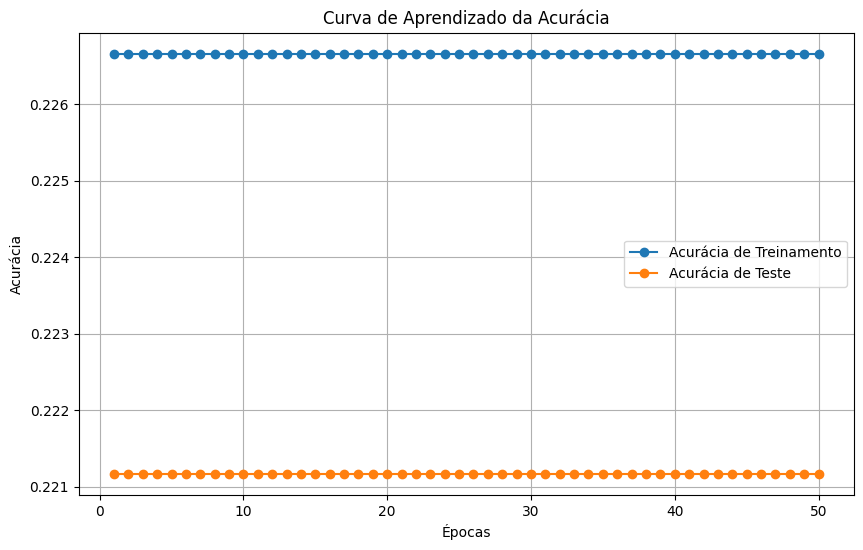

Acurácia para odd125: 0.86
Acurácia para odd150: 0.84
Acurácia para odd200: 0.71
Acurácia para odd500: 0.90
Acurácia para odd1000: 0.95
Acurácia para odd2000: 0.97
Acurácia para odd5000: 0.99
Acurácia para odd10000: 0.99


In [ ]:
# Defina as colunas de entrada e saída
features = ['hora', 'minutos', 'segundos']
target_columns = ['odd125','odd150','odd200', 'odd500', 'odd1000','odd2000', 'odd5000', 'odd10000']

# Separe as características e os alvos
X = data[features].values
y = data[target_columns].values

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize os dados
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construa o modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(8, activation='sigmoid'))  # Três saídas para above_2, above_5 e above_10

# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Lists para armazenar a acurácia durante o treinamento
train_accuracies = []
test_accuracies = []

# Treine o modelo e acompanhe a acurácia durante o treinamento
for epoch in range(50):
    model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)  # Treinamento de uma época por vez

    # Calcule a acurácia no conjunto de treinamento
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, (y_train_pred > 0.5).astype(int))
    train_accuracies.append(train_accuracy)

    # Calcule a acurácia no conjunto de teste
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, (y_test_pred > 0.5).astype(int))
    test_accuracies.append(test_accuracy)

    print(f'Época {epoch + 1}/{50} - Acurácia de Treinamento: {train_accuracy:.2f} - Acurácia de Teste: {test_accuracy:.2f}')

# Plotar a curva de aprendizado da acurácia
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_accuracies, label='Acurácia de Treinamento', marker='o')
plt.plot(range(1, 51), test_accuracies, label='Acurácia de Teste', marker='o')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Curva de Aprendizado da Acurácia')
plt.legend()
plt.grid()
plt.show()

# Calcule a acurácia para cada classe no conjunto de teste final
for i, target in enumerate(target_columns):
    accuracy = accuracy_score(y_test[:, i], (y_test_pred[:, i] > 0.5).astype(int))
    print(f"Acurácia para {target}: {accuracy:.2f}")

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pré-processamento dos dados
# Separe as características (X) e os rótulos (y)
X = data[['Odd_ajustada', 'hora', 'minutos', 'segundos']].values
y = data[['odd125', 'odd150', 'odd200', 'odd500', 'odd1000', 'odd2000', 'odd5000', 'odd10000']].values

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construa uma rede neural para previsão
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='linear')  # Saída com 8 neurônios para os intervalos
])

# Compile o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treine o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Faça previsões com o modelo treinado
y_pred = model.predict(X_test)

# Avalie o desempenho do modelo, por exemplo, calculando o erro médio quadrático (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Agora você pode usar esse modelo treinado para prever intervalos de acerto com base em novos dados.


Epoch 1/50
660/660 [==============================] - 3s 3ms/step - loss: 0.0820 - val_loss: 0.0825
Epoch 2/50
660/660 [==============================] - 1s 2ms/step - loss: 0.0815 - val_loss: 0.0815
Epoch 3/50
660/660 [==============================] - 1s 2ms/step - loss: 0.0832 - val_loss: 0.0782
Epoch 4/50
660/660 [==============================] - 1s 2ms/step - loss: 0.0770 - val_loss: 0.0766
Epoch 5/50
660/660 [==============================] - 1s 2ms/step - loss: 0.0749 - val_loss: 0.0746
Epoch 6/50
660/660 [==============================] - 1s 2ms/step - loss: 0.0730 - val_loss: 0.0722
Epoch 7/50
660/660 [==============================] - 1s 1ms/step - loss: 0.0706 - val_loss: 0.0699
Epoch 8/50
660/660 [==============================] - 1s 2ms/step - loss: 0.0683 - val_loss: 0.0677
Epoch 9/50
660/660 [==============================] - 2s 3ms/step - loss: 0.0662 - val_loss: 0.0659
Epoch 10/50
660/660 [==============================] - 1s 2ms/step - loss: 0.0646 - val_loss: 0.0647

In [ ]:
import pandas as pd
from pytz import timezone  # Importe a biblioteca de fuso horário apropriada

# Especifique o fuso horário desejado (por exemplo, 'America/Sao_Paulo' para São Paulo)
tz = timezone('America/Boa_Vista')

# Obtenha o horário local com o fuso horário especificado
ultimo_horario = pd.Timestamp.now(tz)

print(ultimo_horario)

# Calcular a média dos valores filtrados
intervalo_medio = data['tempo_em_segundos'].mean()
print(intervalo_medio)

# Criar novos tempos previstos
n_previsoes = 15  # Número de novos tempos a serem previstos
novos_tempos = []

for _ in range(n_previsoes):
    # Calcule o próximo horário previsto com base no intervalo médio
    if len(novos_tempos) == 0:
      ultimo_horario = pd.Timestamp.now(tz)
    else:
      ultimo_horario = novos_tempos[-1]
    proximo_horario_previsto = ultimo_horario + pd.Timedelta(seconds=intervalo_medio)

    # Adicione o próximo horário previsto à lista de novos tempos
    novos_tempos.append(proximo_horario_previsto)


# Converta os novos tempos para o formato de string
novos_tempos_str = [horario.strftime("%I:%M:%S") for horario in novos_tempos]

print(novos_tempos_str)

horas = []
minutos = []
segundos = []
for item in novos_tempos_str:
    dt = item.split(':')
    #print(dt)
    horas.append(float(dt[0]))
    minutos.append(float(dt[1]))
    segundos.append(float(dt[2]))

horas = pd.DataFrame(horas)
minutos = pd.DataFrame(minutos)
segundos = pd.DataFrame(segundos)

feature1 = pd.concat([horas, minutos, segundos], axis = 1)
print(feature1)

X_most = feature1.values

X_most1 = scaler.transform(X_most)

predicts = model.predict(X_most1)

print(predicts)

# Tokenize e padronize os novos tempos da mesma forma que os dados de treinamento
#novos_tempos_padded = tf.keras.preprocessing.sequence.pad_sequences(novos_tempos_str, maxlen=n_previsoes)

# Faça previsões com os novos tempos
#novas_previsoes = model.predict(novos_tempos_padded)

# Inverta a escala das previsões (se necessário)
#novas_previsoes_scaled = scaler.inverse_transform(predicts)

# Exiba as previsões junto com os horários previstos
#for i, previsao in enumerate(predicts):
#  print(f"Previsão {i + 1}: {previsao} - Horário: {novos_tempos_str[i]}")
# Exiba as previsões junto com os horários previstos
for i, previsao in enumerate(predicts):
    print(f"Previsão para o horário {novos_tempos_str[i]}:")
    for j, target in enumerate(target_columns):
        print(f"   Acurácia para {target}: {previsao[j]:.2f}")


2023-09-24 12:12:35.458191-04:00
391.9320859058369
['12:19:07', '12:25:39', '12:32:11', '12:38:43', '12:45:15', '12:51:47', '12:58:18', '01:04:50', '01:11:22', '01:17:54', '01:24:26', '01:30:58', '01:37:30', '01:44:02', '01:50:34']
       0     0     0
0   12.0  19.0   7.0
1   12.0  25.0  39.0
2   12.0  32.0  11.0
3   12.0  38.0  43.0
4   12.0  45.0  15.0
5   12.0  51.0  47.0
6   12.0  58.0  18.0
7    1.0   4.0  50.0
8    1.0  11.0  22.0
9    1.0  17.0  54.0
10   1.0  24.0  26.0
11   1.0  30.0  58.0
12   1.0  37.0  30.0
13   1.0  44.0   2.0
14   1.0  50.0  34.0


ValueError: ignored

In [ ]:
data['Odd_ajustada'].describe()

count    26401.000000
mean        13.764437
std        502.107957
min          1.000000
25%          1.290000
50%          1.920000
75%          3.830000
max      70126.000000
Name: Odd_ajustada, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Extrair as features (hora, minutos, segundos) e os targets (odd125, odd150, odd200, odd500, odd1000, odd2000, odd5000, odd10000)
features = ['Odd_ajustada', 'hora', 'minutos', 'segundos']
target_columns = ['odd125', 'odd150', 'odd200', 'odd500', 'odd1000', 'odd2000', 'odd5000', 'odd10000']

# Separe as características e os alvos
X = data[features].values
y = data[target_columns].values

# Pré-processamento dos dados
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Definir o número de folds para a validação cruzada
n_splits = 5

# Listas para armazenar as métricas de cada fold
mae_scores = []
mse_scores = []
r2_scores = []
rmse_scores = []
mape_scores = []

# Realizar a validação cruzada
for train_index, test_index in KFold(n_splits=n_splits).split(X_scaled):
    # Dividir os dados em conjunto de treinamento e teste para o fold atual
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]

    # Construir o modelo LSTM
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(len(target_columns), activation='sigmoid'))  # Número de neurônios igual ao número de targets

    # Compilar o modelo
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    # Treinar o modelo
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Use verbose=0 para evitar saída no treinamento

    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Inverter a escala das previsões para obter valores reais
    y_pred_real = scaler_y.inverse_transform(y_pred)
    y_test_real = scaler_y.inverse_transform(y_test)

    # Calcular as métricas para cada target
    fold_mae = mean_absolute_error(y_test_real, y_pred_real)
    fold_mse = mean_squared_error(y_test_real, y_pred_real)
    fold_r2 = r2_score(y_test_real, y_pred_real)
    fold_rmse = np.sqrt(fold_mse)
    fold_mape = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100

    # Armazenar as métricas do fold atual
    mae_scores.append(fold_mae)
    mse_scores.append(fold_mse)
    r2_scores.append(fold_r2)
    rmse_scores.append(fold_rmse)
    mape_scores.append(fold_mape)

# Calcular as médias das métricas de todos os folds
cv_mae = np.mean(mae_scores)
cv_mse = np.mean(mse_scores)
cv_r2 = np.mean(r2_scores)
cv_rmse = np.mean(rmse_scores)
cv_mape = np.mean(mape_scores)

# Imprimir as métricas de validação cruzada
print(f"Erro médio absoluto (MAE) usando validação cruzada: {cv_mae}")
print(f"Erro médio quadrático (MSE) usando validação cruzada: {cv_mse}")
print(f"R-squared (R2) usando validação cruzada: {cv_r2}")
print(f"Root Mean Squared Error (RMSE) usando validação cruzada: {cv_rmse}")
print(f"Mean Absolute Percentage Error (MAPE) usando validação cruzada: {cv_mape}")

166/166 [==============================] - 3s 5ms/step


<ipython-input-58-b88bb71accf2>:56: RuntimeWarning: divide by zero encountered in divide
  fold_mape = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100


165/165 [==============================] - 2s 4ms/step


<ipython-input-58-b88bb71accf2>:56: RuntimeWarning: divide by zero encountered in divide
  fold_mape = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100


165/165 [==============================] - 2s 6ms/step


<ipython-input-58-b88bb71accf2>:56: RuntimeWarning: divide by zero encountered in divide
  fold_mape = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100


165/165 [==============================] - 2s 3ms/step


<ipython-input-58-b88bb71accf2>:56: RuntimeWarning: divide by zero encountered in divide
  fold_mape = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100


165/165 [==============================] - 2s 4ms/step
Erro médio absoluto (MAE) usando validação cruzada: 0.2403959707042244
Erro médio quadrático (MSE) usando validação cruzada: 0.12039742604169215
R-squared (R2) usando validação cruzada: 0.0034700503653152747
Root Mean Squared Error (RMSE) usando validação cruzada: 0.3469787704204313
Mean Absolute Percentage Error (MAPE) usando validação cruzada: inf


<ipython-input-58-b88bb71accf2>:56: RuntimeWarning: divide by zero encountered in divide
  fold_mape = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100
